In [1]:
import numpy as np
import pandas as pd
import numpy as np
import keras
from keras.models import Model
from keras.layers import Dense, Input
from keras.layers import Dropout
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras import Sequential


In [2]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
data = pd.read_csv("/content/drive/MyDrive/Google_Stock_Price_Train.csv")

In [4]:
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [ ]:
data.describe()

,Open,High,Low
count,1258.000000,1258.000000,1258.000000
mean,533.709833,537.880223,529.007409
std,151.904442,153.008811,150.552807
min,279.120000,281.210000,277.220000
25%,404.115000,406.765000,401.765000
50%,537.470000,540.750000,532.990000
75%,654.922500,662.587500,644.800000
max,816.680000,816.680000,805.140000


In [ ]:
data.isna().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

DATA PREPROCESSING FOR VISUALISATION

In [ ]:
train_close = data.iloc[:, 4:5].values
train_vol = data.iloc[:, 5:6].values
print(train_close)
print(train_vol)

[['663.59']
 ['666.45']
 ['657.21']
 ...
 ['785.05']
 ['782.79']
 ['771.82']]
[['7,380,500']
 ['5,749,400']
 ['6,590,300']
 ...
 ['1,153,800']
 ['744,300']
 ['1,770,000']]


In [ ]:
train_close_=[]
train_close = train_close.flatten()
for i in range(len(train_close)):

  b = ''.join(str(train_close[i]).split(','))
  train_close_.append(float(b))
train_close_ = np.array(train_close_)

In [ ]:
train_vol_=[]
train_vol = train_vol.flatten()
for i in range(len(train_vol)):

  b = ''.join(str(train_vol[i]).split(','))
  train_vol_.append(float(b))
train_vol_ = np.array(train_vol_)

In [ ]:
train_close_2D = np.reshape(train_close_, (len(train_close), 1))
train_vol_2D = np.reshape(train_vol_, (len(train_vol), 1))

In [ ]:
df = data.copy()
df.pop("Close")
df.pop("Volume")

0        7,380,500
1        5,749,400
2        6,590,300
3        5,405,900
4       11,688,800
           ...    
1253       623,400
1254       789,100
1255     1,153,800
1256       744,300
1257     1,770,000
Name: Volume, Length: 1258, dtype: object

In [ ]:
df["Close"] = train_close_2D
df["Volume"] = train_vol_2D
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,7380500.0
1,1/4/2012,331.27,333.87,329.08,666.45,5749400.0
2,1/5/2012,329.83,330.75,326.89,657.21,6590300.0
3,1/6/2012,328.34,328.77,323.68,648.24,5405900.0
4,1/9/2012,322.04,322.29,309.46,620.76,11688800.0


In [ ]:
df.describe()

,Open,High,Low,Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,533.709833,537.880223,529.007409,712.669666,3.158107e+06
std,151.904442,153.008811,150.552807,164.752591,2.273726e+06
min,279.120000,281.210000,277.220000,491.200000,7.900000e+03
25%,404.115000,406.765000,401.765000,576.740000,1.621700e+06
50%,537.470000,540.750000,532.990000,695.675000,2.566150e+06
75%,654.922500,662.587500,644.800000,782.105000,4.122500e+06
max,816.680000,816.680000,805.140000,1216.830000,2.497790e+07


DATA VISUALISATION


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc84a691c50>,
      dtype=object)

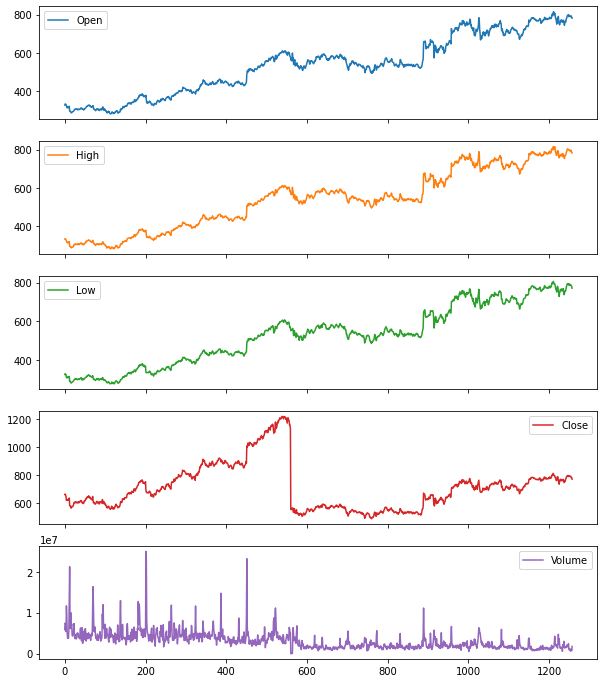

In [ ]:
df.plot(subplots=True, figsize=(10, 12))

Rolling


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


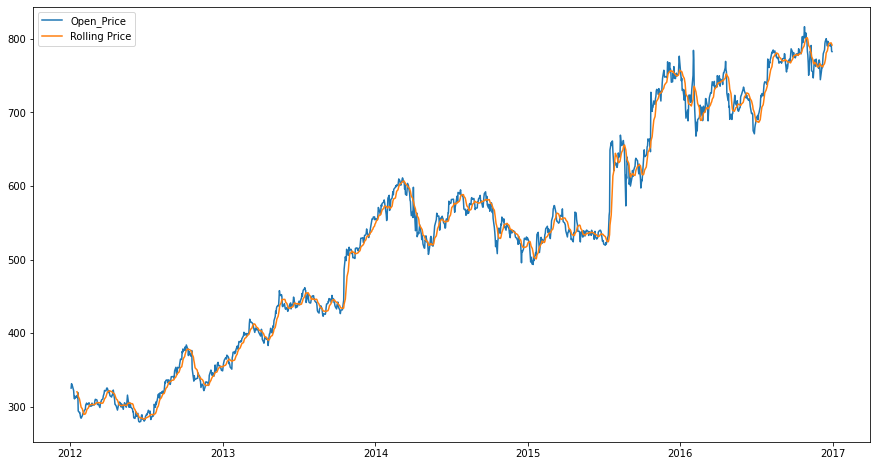

In [ ]:
plt.figure(figsize=(15, 8))
df_open = df[['Date', 'Open']]
df_open['Date'] = pd.to_datetime(df_open['Date'])
rolling_open = df_open.Open.rolling(10).mean()
plt.plot(df_open.Date, df_open.Open)
plt.plot(df_open.Date, rolling_open)
plt.legend(['Open_Price', 'Rolling Price'])
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


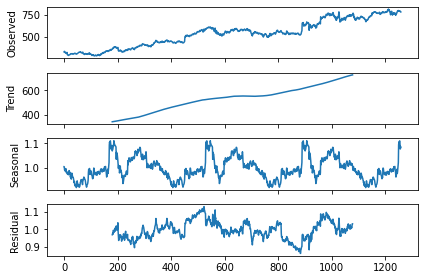

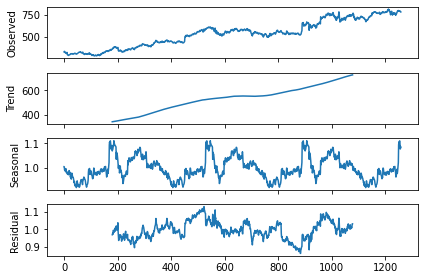

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
df_open['Date'] = pd.to_datetime(df_open['Date'])

components = seasonal_decompose(df_open['Open'], model='multiplicative', freq = 360)
 
components.plot()

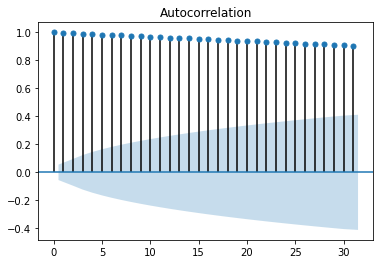

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_open['Open'])
plt.show ()

Preprocessing for Model Training

In [5]:
train_open = data.iloc[:, 1:2].values
train_high = data.iloc[:, 2:3].values
train_low = data.iloc[:, 3:4].values
train_close = data.iloc[:, 4:5].values
train_vol = data.iloc[:, 5:6].values

In [6]:
train_close

array([['663.59'],
       ['666.45'],
       ['657.21'],
       ...,
       ['785.05'],
       ['782.79'],
       ['771.82']], dtype=object)

In [7]:
train_close_=[]
train_close = train_close.flatten()
for i in range(len(train_close)):

  b = ''.join(str(train_close[i]).split(','))
  train_close_.append(float(b))
train_close_ = np.array(train_close_)

In [8]:
train_vol_=[]
train_vol = train_vol.flatten()
for i in range(len(train_vol)):

  b = ''.join(str(train_vol[i]).split(','))
  train_vol_.append(float(b))
train_vol_ = np.array(train_vol_)

In [9]:
train_close_2D = np.reshape(train_close_, (len(train_close), 1))
train_vol_2D = np.reshape(train_vol_, (len(train_vol), 1))


In [10]:
from sklearn.preprocessing import MinMaxScaler
mms_open = MinMaxScaler(feature_range = (0, 1))
mms_high = MinMaxScaler(feature_range = (0, 1))
mms_low = MinMaxScaler(feature_range = (0, 1))
mms_close = MinMaxScaler(feature_range = (0, 1))
mms_vol = MinMaxScaler(feature_range = (0, 1))

train_open_mms = mms_open.fit_transform(train_open)
train_high_mms = mms_high.fit_transform(train_high)
train_low_mms = mms_low.fit_transform(train_low)
train_close_mms = mms_close.fit_transform(train_close_2D)
train_vol_mms = mms_vol.fit_transform(train_vol_2D)

In [11]:
train_open_mms.flatten()

array([0.08581368, 0.09701243, 0.09433366, ..., 0.95725128, 0.93796041,
       0.93688146])

In [12]:
import matplotlib.pyplot as plt

In [13]:
data_test = pd.read_csv("/content/drive/MyDrive/Google_Stock_Price_Test.csv")

In [ ]:
data_test

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


In [14]:
test_open = data_test.iloc[:, 1:2].values
test_high = data_test.iloc[:, 2:3].values
test_low = data_test.iloc[:, 3:4].values
test_close = data_test.iloc[:, 4:5].values
test_vol = data_test.iloc[:, 5:6].values


In [15]:
test_close_=[]
test_close = test_close.flatten()
for i in range(len(test_close)):

  b = ''.join(str(test_close[i]).split(','))
  test_close_.append(float(b))
test_close_ = np.array(test_close_)

In [16]:
test_vol_=[]
test_vol = test_vol.flatten()
for i in range(len(test_vol)):

  b = ''.join(str(test_vol[i]).split(','))
  test_vol_.append(float(b))
test_vol_ = np.array(test_vol_)

In [17]:
test_close_2D = np.reshape(test_close_, (len(test_close), 1))
test_vol_2D = np.reshape(test_vol_, (len(test_vol), 1))


In [ ]:

def visualize(x, count):
  plt.plot(x, color = 'red')

  plt.title(count)
  
  plt.xlabel('Time')
  plt.ylabel('Google Stock Price')

  plt.show()
  

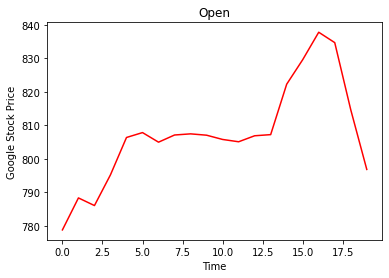

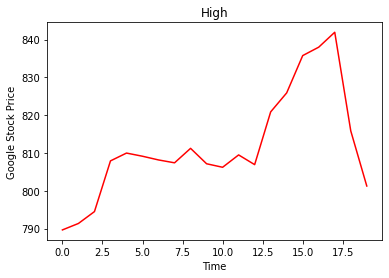

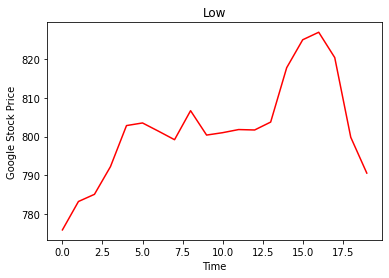

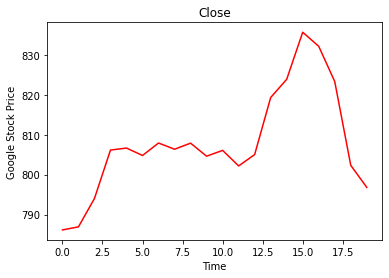

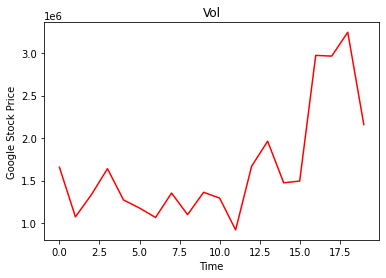

In [ ]:
visualize(test_open, "Open")
visualize(test_high, "High")
visualize(test_low, "Low")
visualize(test_close_2D, "Close")
visualize(test_vol_2D, "Vol")

Trying various models and generating training and testing set 

With last 20 timesteps as features

In [18]:
train_data_open_20 = []
y_train_data_open_20 = []
for i in range(20, len(train_open_mms)):
    train_data_open_20.append(train_open.flatten()[i-20:i])
    y_train_data_open_20.append(train_open.flatten()[i])
train_data_open_20 = np.array(train_data_open_20)
y_train_data_open_20 = np.array(y_train_data_open_20)

train_data_open_20.shape

(1238, 20)

In [19]:
x_20 = train_open.flatten()
req_train_20 = x_20[len(x_20)-20:]
y_20 = test_open.flatten()
z_20 = np.concatenate([req_train_20, y_20])
z_1_20 = np.reshape(z_20, (len(z_20), 1))

X_test_20 = []
for i in range(20, 40):
    X_test_20.append(z_1_20.flatten()[i-20:i])
X_test_20 = np.array(X_test_20)
X_test_20.shape

(20, 20)

In [20]:
from sklearn.linear_model import LinearRegression
reg_20 = LinearRegression()
reg_20.fit(train_data_open_20, y_train_data_open_20)
y_pred_lr_20 = reg_20.predict(X_test_20)
y_pred_lr_20

array([783.71492038, 779.67245821, 789.16616586, 787.84449028,
       794.92978544, 805.90166216, 808.44524609, 805.12993882,
       805.12627288, 808.0811952 , 806.83612928, 806.29593329,
       803.74144603, 806.32952298, 807.43572478, 821.03467426,
       829.25947228, 837.60018348, 834.61241803, 813.52331716])

In [21]:
a = test_open.flatten()
err=0
b = y_pred_lr_20.flatten()
from sklearn.metrics import mean_squared_error as mse
err = mse(a, b)
print(err)

69.3553153187003


In [22]:
from sklearn.metrics import r2_score
r2_lr_20 = r2_score(a, b)
r2_lr_20

0.6808897316147363

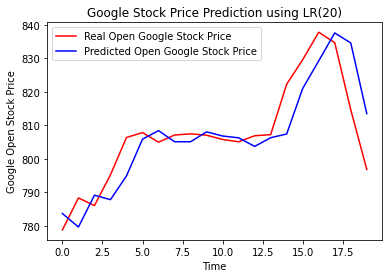

In [23]:
plt.plot(test_open.flatten(), color = 'red', label = 'Real Open Google Stock Price')
plt.plot(y_pred_lr_20, color = 'blue', label = 'Predicted Open Google Stock Price')
plt.title('Google Stock Price Prediction using LR(20)')
plt.xlabel('Time')
plt.ylabel('Google Open Stock Price')
plt.legend()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
regr_rfr_20 = RandomForestRegressor()
regr_rfr_20.fit(train_data_open_20, y_train_data_open_20)
y_pred_rfr_20 = regr_rfr_20.predict(X_test_20)
y_pred_rfr_20

array([781.0385, 780.5835, 786.9195, 784.1366, 794.6134, 802.0439,
       804.7469, 806.4532, 805.0526, 802.5785, 800.8086, 801.6135,
       800.8442, 800.3343, 800.6941, 800.1165, 800.1156, 799.8669,
       797.4077, 798.2403])

In [ ]:
a = test_open.flatten()
err=0
b = y_pred_rfr_20.flatten()
from sklearn.metrics import mean_squared_error as mse
err = mse(a, b)
print(err)

239.14878688450617


In [ ]:
from sklearn.metrics import r2_score
r2_rfr_20 = r2_score(a, b)
r2_rfr_20

-0.10034585260040174

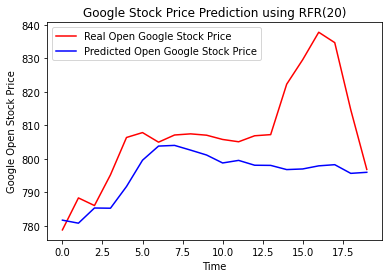

In [ ]:
plt.plot(test_open.flatten(), color = 'red', label = 'Real Open Google Stock Price')
plt.plot(y_pred_rfr_20, color = 'blue', label = 'Predicted Open Google Stock Price')
plt.title('Google Stock Price Prediction using RFR(20)')
plt.xlabel('Time')
plt.ylabel('Google Open Stock Price')
plt.legend()
plt.show()

In [ ]:
pip install lightgbm


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import lightgbm as lgb
regr_lgb_20 = lgb.LGBMRegressor()
regr_lgb_20.fit(train_data_open_20, y_train_data_open_20)
y_pred_regr_lgb_20 = regr_lgb_20.predict(X_test_20)
y_pred_regr_lgb_20


array([777.10881158, 770.68092926, 782.10230909, 785.32644472,
       784.55580695, 787.18446582, 786.37502959, 786.25344134,
       786.57342347, 787.9773825 , 785.79805298, 786.39059616,
       786.28500613, 786.1354202 , 787.98968807, 792.55635356,
       788.08172543, 788.42485383, 788.52891369, 783.15203706])

In [ ]:
a = test_open.flatten()
err=0
b = y_pred_regr_lgb_20.flatten()
from sklearn.metrics import mean_squared_error as mse
err = mse(a, b)
print(err)  


628.9537104752876


In [ ]:
from sklearn.metrics import r2_score
r2_lgb_20 = r2_score(a, b)
r2_lgb_20

-1.893874628489507

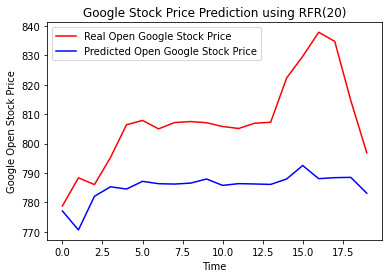

In [ ]:
plt.plot(test_open.flatten(), color = 'red', label = 'Real Open Google Stock Price')
plt.plot(y_pred_regr_lgb_20, color = 'blue', label = 'Predicted Open Google Stock Price')
plt.title('Google Stock Price Prediction using RFR(20)')
plt.xlabel('Time')
plt.ylabel('Google Open Stock Price')
plt.legend()
plt.show()

Transforming input for RNN feeding

In [44]:
train_data_open = []
test_data_open = []
for i in range(20, len(train_open_mms)):
    train_data_open.append(train_open_mms.flatten()[i-20:i])
    test_data_open.append(train_open_mms.flatten()[i])
train_data_open = np.array(train_data_open)
test_data_open = np.array(test_data_open)


from numpy import newaxis
train_data_open = train_data_open[:, :, newaxis]
train_data_open


array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.00967334],
        [0.01642607],
        [0.02100231]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.01642607],
        [0.02100231],
        [0.02280676]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.02100231],
        [0.02280676],
        [0.02273235]],

       ...,

       [[0.91600938],
        [0.9132934 ],
        [0.88979835],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.9132934 ],
        [0.88979835],
        [0.86589404],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.88979835],
        [0.86589404],
        [0.89030062],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

In [46]:
model = Sequential()
from keras.layers.recurrent import LSTM
model.add(LSTM(128, input_shape=(20, 1), activation='relu', return_sequences=True))


model.add(LSTM(64, activation='relu'))


model.add(Dense(32, activation='relu'))


model.add(Dense(10, activation='softmax'))
model.add(Dense(1))



model.compile(optimizer = 'adam', loss = 'mean_squared_error')
final = model.fit(train_data_open, test_data_open, epochs = 100)

Epoch 1/100
39/39 [==============================] - 7s 64ms/step - loss: 0.1846
Epoch 2/100
39/39 [==============================] - 3s 65ms/step - loss: 0.0318
Epoch 3/100
39/39 [==============================] - 3s 64ms/step - loss: 0.0227
Epoch 4/100
39/39 [==============================] - 3s 65ms/step - loss: 0.0166
Epoch 5/100
39/39 [==============================] - 3s 64ms/step - loss: 0.0122
Epoch 6/100
39/39 [==============================] - 3s 65ms/step - loss: 0.0089
Epoch 7/100
39/39 [==============================] - 2s 64ms/step - loss: 0.0065
Epoch 8/100
39/39 [==============================] - 3s 65ms/step - loss: 0.0051
Epoch 9/100
39/39 [==============================] - 3s 64ms/step - loss: 0.0038
Epoch 10/100
39/39 [==============================] - 3s 65ms/step - loss: 0.0031
Epoch 11/100
39/39 [==============================] - 3s 65ms/step - loss: 0.0026
Epoch 12/100
39/39 [==============================] - 3s 65ms/step - loss: 0.0021
Epoch 13/100
39/39 [=====

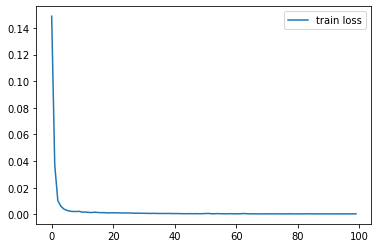

In [ ]:
plt.plot(final.history['loss'], label='train loss')
plt.legend()
plt.show()

In [47]:
x = train_open.flatten()
req_train = x[len(x)-20:]
y = test_open.flatten()
z = np.concatenate([req_train, y])
z_1 = np.reshape(z, (len(z), 1))
mms = MinMaxScaler(feature_range = (0, 1))

z_2 = mms.fit_transform(z_1)
X_test = []
for i in range(20, 40):
    X_test.append(z_2.flatten()[i-20:i])
X_test = np.array(X_test)


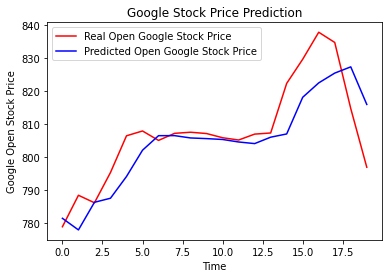

In [48]:
pred_open = model.predict(X_test)

pred_open_ = mms.inverse_transform(pred_open)
plt.plot(test_open, color = 'red', label = 'Real Open Google Stock Price')
plt.plot(pred_open_, color = 'blue', label = 'Predicted Open Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Open Stock Price')
plt.legend()
plt.show()

In [49]:
a = test_open.flatten()
err=0
b = pred_open_.flatten()
from sklearn.metrics import mean_squared_error as mse
err = mse(a, b)
print(err)

79.83507330259104


In [50]:
from sklearn.metrics import r2_score
r2_lstm_20 = r2_score(a, b)
r2_lstm_20

0.6326713886155764

With last 40 timesteps as features

In [28]:
train_data_open_40 = []
y_train_data_open_40 = []
for i in range(40, len(train_open_mms)):
    train_data_open_40.append(train_open.flatten()[i-40:i])
    y_train_data_open_40.append(train_open.flatten()[i])
train_data_open_40 = np.array(train_data_open_40)
y_train_data_open_40 = np.array(y_train_data_open_40)

train_data_open_40.shape

(1218, 40)

In [29]:
x_40 = train_open.flatten()
req_train_40 = x_40[len(x_40)-40:]
y_40 = test_open.flatten()
z_40 = np.concatenate([req_train_40, y_40])
z_1_40 = np.reshape(z_40, (len(z_40), 1))

X_test_40 = []
for i in range(40, 60):
    X_test_40.append(z_1_40.flatten()[i-40:i])
X_test_40 = np.array(X_test_40)

In [30]:
from sklearn.linear_model import LinearRegression
reg_40 = LinearRegression()
reg_40.fit(train_data_open_40, y_train_data_open_40)
y_pred_lr_40 = reg_40.predict(X_test_40)
y_pred_lr_40

array([782.57954199, 781.63285608, 789.56298071, 789.78010728,
       795.67607857, 806.55401922, 809.94430951, 801.57222844,
       804.72324558, 810.83411684, 806.363678  , 804.20072738,
       803.3884097 , 805.72419185, 807.62786644, 818.79541015,
       828.55181016, 839.85471044, 830.94156283, 812.29458551])

In [31]:
a = test_open.flatten()
err=0
b = y_pred_lr_40.flatten()
from sklearn.metrics import mean_squared_error as mse
err = mse(a, b)
print(err)

62.96470672035705


In [32]:
from sklearn.metrics import r2_score
r2_lr_40 = r2_score(a, b)
r2_lr_40

0.7102935172595928

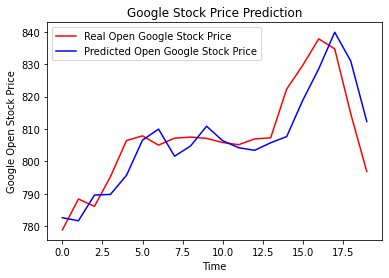

In [33]:
plt.plot(test_open.flatten(), color = 'red', label = 'Real Open Google Stock Price')
plt.plot(y_pred_lr_40, color = 'blue', label = 'Predicted Open Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Open Stock Price')
plt.legend()
plt.show()

In [34]:
train_data_open = []
test_data_open = []
for i in range(40, len(train_open_mms)):
    train_data_open.append(train_open_mms.flatten()[i-40:i])
    test_data_open.append(train_open_mms.flatten()[i])
train_data_open = np.array(train_data_open)
test_data_open = np.array(test_data_open)


from numpy import newaxis
train_data_open = train_data_open[:, :, newaxis]
train_data_open


array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.04286033],
        [0.04602277],
        [0.05398467]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.04602277],
        [0.05398467],
        [0.05738894]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.05398467],
        [0.05738894],
        [0.05714711]],

       ...,

       [[0.96054394],
        [0.9371419 ],
        [0.92841729],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.9371419 ],
        [0.92841729],
        [0.90804747],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.92841729],
        [0.90804747],
        [0.8771858 ],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

In [35]:
model_40 = Sequential()
from keras.layers.recurrent import LSTM
model_40.add(LSTM(128, input_shape=(40, 1), activation='relu', return_sequences=True))
model_40.add(LSTM(64, activation='relu'))


model_40.add(Dense(32, activation='relu'))


model_40.add(Dense(10, activation='softmax'))
model_40.add(Dense(1))

model_40.compile(optimizer = 'adam', loss = 'mean_squared_error')
final = model_40.fit(train_data_open, test_data_open, epochs = 100)

Epoch 1/100
39/39 [==============================] - 10s 125ms/step - loss: 0.0928
Epoch 2/100
39/39 [==============================] - 5s 125ms/step - loss: 0.0090
Epoch 3/100
39/39 [==============================] - 5s 124ms/step - loss: 0.0131
Epoch 4/100
39/39 [==============================] - 5s 124ms/step - loss: 0.0060
Epoch 5/100
39/39 [==============================] - 5s 124ms/step - loss: 0.0036
Epoch 6/100
39/39 [==============================] - 5s 123ms/step - loss: 0.0029
Epoch 7/100
39/39 [==============================] - 5s 125ms/step - loss: 0.0024
Epoch 8/100
39/39 [==============================] - 5s 123ms/step - loss: 0.0027
Epoch 9/100
39/39 [==============================] - 5s 124ms/step - loss: 0.0024
Epoch 10/100
39/39 [==============================] - 5s 125ms/step - loss: 0.0021
Epoch 11/100
39/39 [==============================] - 5s 125ms/step - loss: 0.0021
Epoch 12/100
39/39 [==============================] - 5s 123ms/step - loss: 0.0020
Epoch 13/100

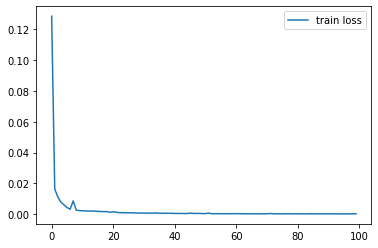

In [ ]:
plt.plot(final.history['loss'], label='train loss')
plt.legend()
plt.show()

In [36]:
x = train_open.flatten()
req_train = x[len(x)-40:]
y = test_open.flatten()
z = np.concatenate([req_train, y])
z_1 = np.reshape(z, (len(z), 1))
mms = MinMaxScaler(feature_range = (0, 1))

z_2 = mms.fit_transform(z_1)
X_test = []
for i in range(40, 60):
    X_test.append(z_2.flatten()[i-40:i])
X_test = np.array(X_test)


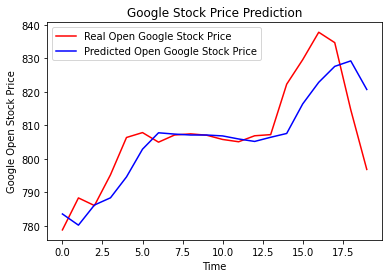

In [37]:
pred_open = model_40.predict(X_test)

pred_open_ = mms.inverse_transform(pred_open)
plt.plot(test_open, color = 'red', label = 'Real Open Google Stock Price')
plt.plot(pred_open_, color = 'blue', label = 'Predicted Open Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Open Stock Price')
plt.legend()
plt.show()

In [38]:
a = test_open.flatten()
err=0
b = pred_open_.flatten()
from sklearn.metrics import mean_squared_error as mse
err = mse(a, b)
print(err)

87.9580875999274


In [39]:
from sklearn.metrics import r2_score
r2_lstm_40 = r2_score(a, b)
r2_lstm_40

0.5952966429222002

With last 60 timesteps as features

In [ ]:
train_data_open = []
test_data_open = []
for i in range(60, len(train_open_mms)):
    train_data_open.append(train_open_mms.flatten()[i-60:i])
    test_data_open.append(train_open_mms.flatten()[i])
train_data_open = np.array(train_data_open)
test_data_open = np.array(test_data_open)

train_data_open.shape

(1198, 60)

In [ ]:

x_60 = train_open.flatten()
req_train_60 = x_60[len(x_60)-60:]
y_60 = test_open.flatten()
z_60 = np.concatenate([req_train_60, y_60])
z_1_60 = np.reshape(z_60, (len(z_60), 1))

X_test_60 = []
for i in range(60, 80):
    X_test_60.append(z_1_60.flatten()[i-60:i])
X_test_60 = np.array(X_test_60)

In [ ]:
from sklearn.linear_model import LinearRegression
reg_60 = LinearRegression()
reg_60.fit(train_data_open, test_data_open)
y_pred_lr_60 = reg_60.predict(X_test_60)
y_pred_lr_60

array([782.22031572, 778.7615305 , 787.62804266, 789.60752677,
       796.67161457, 805.95309191, 808.73970387, 802.80821573,
       802.51349074, 813.58879383, 805.06560028, 808.18558086,
       801.997823  , 798.91691933, 810.06171943, 817.99885072,
       825.27719151, 843.26511973, 828.21059641, 809.02859332])

In [ ]:
a = test_open.flatten()
err=0
b = y_pred_lr_60.flatten()
from sklearn.metrics import mean_squared_error as mse
err = mse(a, b)
print(err)


64.32344182853454


In [ ]:
from sklearn.metrics import r2_score
r2_lr_60 = r2_score(a, b)
r2_lr_60

0.7040418504184488

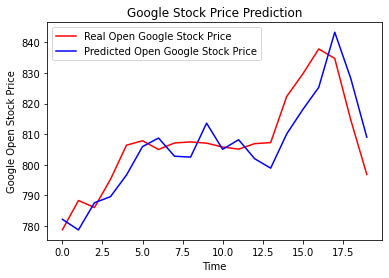

In [ ]:
plt.plot(test_open.flatten(), color = 'red', label = 'Real Open Google Stock Price')
plt.plot(y_pred_lr_60, color = 'blue', label = 'Predicted Open Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Open Stock Price')
plt.legend()
plt.show()

In [ ]:
train_data_high = []
test_data_high = []
for i in range(60, len(train_high_mms)):
    train_data_high.append(train_high_mms.flatten()[i-60:i])
    test_data_high.append(train_high_mms.flatten()[i])
train_data_high = np.array(train_data_high)
test_data_high = np.array(test_data_high)

train_data_high.shape

(1198, 60)

In [ ]:
train_data_low = []
test_data_low = []
for i in range(60, len(train_low_mms)):
    train_data_low.append(train_low_mms.flatten()[i-60:i])
    test_data_low.append(train_low_mms.flatten()[i])
train_data_low = np.array(train_data_low)
test_data_low = np.array(test_data_low)

train_data_low.shape

(1198, 60)

In [ ]:
train_data_close = []
test_data_close = []
for i in range(60, len(train_close_mms)):
    train_data_close.append(train_close_mms.flatten()[i-60:i])
    test_data_close.append(train_close_mms.flatten()[i])
train_data_close = np.array(train_data_close)
test_data_close = np.array(test_data_close)

train_data_close.shape

(1198, 60)

In [ ]:
train_data_vol = []
test_data_vol = []
for i in range(60, len(train_vol_mms)):
    train_data_vol.append(train_vol_mms.flatten()[i-60:i])
    test_data_vol.append(train_vol_mms.flatten()[i])
train_data_vol = np.array(train_data_vol)
test_data_vol = np.array(test_data_vol)

train_data_vol.shape

(1198, 60)

Converting to RNN required input

In [ ]:
from numpy import newaxis

train_data_open = train_data_open[:, :, newaxis]
train_data_open.shape

(1198, 60, 1)

In [ ]:
train_data_high = train_data_high[:, :, newaxis]
train_data_high.shape
train_data_low = train_data_low[:, :, newaxis]

train_data_close = train_data_close[:, :, newaxis]
train_data_vol = train_data_vol[:, :, newaxis]


In [ ]:
x = train_open.flatten()
req_train = x[len(x)-60:]

In [ ]:
req_train.shape

(60,)

In [ ]:
y = test_open.flatten()
z = np.concatenate([req_train, y])

In [ ]:
z_1 = np.reshape(z, (len(z), 1))


In [ ]:
mms = MinMaxScaler(feature_range = (0, 1))

z_2 = mms.fit_transform(z_1)

In [ ]:
X_test = []
for i in range(60, 80):
    X_test.append(z_2.flatten()[i-60:i])
X_test = np.array(X_test)


In [ ]:
x = train_high.flatten()
req_train = x[len(x)-60:]
y = test_high.flatten()
z = np.concatenate([req_train, y])
z_1 = np.reshape(z, (len(z), 1))
mms_test_high = MinMaxScaler(feature_range = (0, 1))

z_2 = mms_test_high.fit_transform(z_1)
X_test_high = []
for i in range(60, 80):
    X_test_high.append(z_2.flatten()[i-60:i])
X_test_high = np.array(X_test_high)


In [ ]:
x = train_low.flatten()
req_train = x[len(x)-60:]
y = test_low.flatten()
z = np.concatenate([req_train, y])
z_1 = np.reshape(z, (len(z), 1))
mms_test_low = MinMaxScaler(feature_range = (0, 1))

z_2 = mms_test_low.fit_transform(z_1)
X_test_low = []
for i in range(60, 80):
    X_test_low.append(z_2.flatten()[i-60:i])
X_test_low = np.array(X_test_low)


In [ ]:
x = train_close_2D.flatten()
req_train = x[len(x)-60:]
y = test_close_2D.flatten()
z = np.concatenate([req_train, y])
z_1 = np.reshape(z, (len(z), 1))
mms_test_close = MinMaxScaler(feature_range = (0, 1))

z_2 = mms_test_close.fit_transform(z_1)
X_test_close = []
for i in range(60, 80):
    X_test_close.append(z_2.flatten()[i-60:i])
X_test_close = np.array(X_test_close)


In [ ]:
x = train_vol_2D.flatten()
req_train = x[len(x)-60:]
y = test_vol_2D.flatten()
z = np.concatenate([req_train, y])
z_1 = np.reshape(z, (len(z), 1))
mms_test_vol = MinMaxScaler(feature_range = (0, 1))

z_2 = mms_test_vol.fit_transform(z_1)
X_test_vol = []
for i in range(60, 80):
    X_test_vol.append(z_2.flatten()[i-60:i])
X_test_vol = np.array(X_test_high)


Regression Model

In [ ]:
import numpy as np
import keras
from keras.models import Model
from keras.layers import Dense, Input
from keras.layers import Dropout
import numpy as np


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras import Sequential


In [ ]:
train_data_open.shape

(1198, 60, 1)

In [ ]:
model_60 = Sequential()
from keras.layers.recurrent import LSTM
model_60.add(LSTM(128, input_shape=(60, 1), activation='relu', return_sequences=True))


model_60.add(LSTM(96, activation='relu'))

model_60.add(Dense(1))


model_60.compile(optimizer = 'adam', loss = 'mean_squared_error')
model_60.fit(train_data_open, test_data_open, epochs = 83)

Epoch 1/83
38/38 [==============================] - 38s 253ms/step - loss: 0.0427
Epoch 2/83
38/38 [==============================] - 10s 251ms/step - loss: 0.0013
Epoch 3/83
38/38 [==============================] - 10s 251ms/step - loss: 0.0010
Epoch 4/83
38/38 [==============================] - 10s 251ms/step - loss: 0.0010
Epoch 5/83
38/38 [==============================] - 10s 254ms/step - loss: 9.8746e-04
Epoch 6/83
38/38 [==============================] - 10s 251ms/step - loss: 9.9017e-04
Epoch 7/83
38/38 [==============================] - 10s 249ms/step - loss: 9.2454e-04
Epoch 8/83
38/38 [==============================] - 10s 252ms/step - loss: 8.5499e-04
Epoch 9/83
38/38 [==============================] - 10s 252ms/step - loss: 8.0066e-04
Epoch 10/83
38/38 [==============================] - 10s 251ms/step - loss: 8.3279e-04
Epoch 11/83
38/38 [==============================] - 10s 252ms/step - loss: 0.0010
Epoch 12/83
38/38 [==============================] - 10s 253ms/step - lo

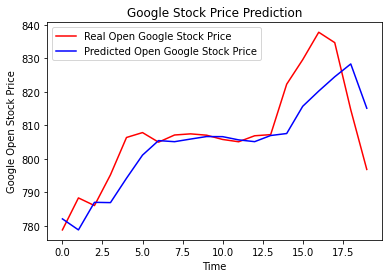

In [ ]:
pred_open = model_60.predict(X_test)

pred_open_ = mms.inverse_transform(pred_open)
plt.plot(test_open, color = 'red', label = 'Real Open Google Stock Price')
plt.plot(pred_open_, color = 'blue', label = 'Predicted Open Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Open Stock Price')
plt.legend()
plt.show()

In [ ]:
a = test_open.flatten()
err=0
b = pred_open_.flatten()
from sklearn.metrics import mean_squared_error as mse
err = mse(a, b)
print(err)


85.99185800090599


In [ ]:
from sklearn.metrics import r2_score
r2_lstm_60 = r2_score(a, b)
r2_lstm_60

0.6043434485227163

Future Predictions for the Stock Opening Prices

In [ ]:
model_1 = Sequential()
from keras.layers.recurrent import LSTM
model_1.add(LSTM(200, input_shape=(60, 1), activation='relu', return_sequences=True))

model_1.add(Dropout(0.2))
model_1.add(LSTM(100, activation='relu'))
model_1.add(Dropout(0.2))


model_1.add(Dense(100, activation='relu'))
model_1.add(Dense(10, activation='softmax'))

model_1.add(Dropout(0.2))
model_1.add(Dense(1))


model_1.compile(optimizer = 'adam', loss = 'mean_squared_error')
model_1.fit(train_data_open, test_data_open, epochs = 100)

In [ ]:
pred_open_2 = model_1.predict(X_test)

pred_open__2 = mms.inverse_transform(pred_open_2)
plt.plot(test_open, color = 'red', label = 'Real Open Google Stock Price')
plt.plot(pred_open__2, color = 'blue', label = 'Predicted Open Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Open Stock Price')
plt.legend()
plt.show()

In [ ]:
a = test_open.flatten()
err=0
b = pred_open__2.flatten()
from sklearn.metrics import mean_squared_error as mse
err = mse(a, b)
print(err)

In [ ]:
def vis(data_org, data_gen, x):
  plt.plot(data_org, color = 'red', label = 'Real' + x + 'Google Stock Price')
  plt.plot(data_gen, color = 'blue', label = 'Predicted' + x + 'Google Stock Price')
  plt.title('Google Stock Price Prediction')
  plt.xlabel('Time')
  plt.ylabel(x)
  plt.legend()
  plt.show()

Future Prediction Pipeline Using some of the above used models


In [ ]:
train_data_open_20 = []
y_train_data_open_20 = []
x_lr_20 = train_open.flatten()
y_lr_20 = test_open.flatten()

full_train_lr_20 = np.concatenate([x_lr_20, y_lr_20])
full_train_lr_20_ = np.reshape(full_train_lr_20, (len(full_train_lr_20), 1))
for i in range(20, len(full_train_lr_20)):
    train_data_open_20.append(full_train_lr_20_.flatten()[i-20:i])
    y_train_data_open_20.append(full_train_lr_20_.flatten()[i])
train_data_open_20 = np.array(train_data_open_20)
y_train_data_open_20 = np.array(y_train_data_open_20)

train_data_open_20.shape

(1258, 20)

In [ ]:
from sklearn.linear_model import LinearRegression
reg_20 = LinearRegression()
reg_20.fit(train_data_open_20, y_train_data_open_20)


LinearRegression()

In [ ]:
y_pred_lr_20 = []
def future_pred_lr_20(point):
    new_test_data = test_open.flatten()
    new_test_data_20 = np.reshape(new_test_data, (len(new_test_data), 1))
    
    for i in range(point):
      X_test_20 = []
      X_test_20.append(new_test_data_20.flatten()[i:])
      X_test_20 = np.array(X_test_20)
      a = reg_20.predict(X_test_20)
      y_pred_lr_20.append(a)
      new_test_data_20 = np.concatenate([new_test_data_20.flatten(), a])
      new_test_data_20 = np.reshape(new_test_data_20, (len(new_test_data_20), 1))

  
future_pred_lr_20(10)
y_pred_lr_20
      



[array([797.17482875]),
 array([797.43289792]),
 array([799.65239912]),
 array([801.47413478]),
 array([802.3494023]),
 array([801.53129396]),
 array([801.50492645]),
 array([802.16384904]),
 array([803.02921732]),
 array([804.28401083])]

In [ ]:
y_future_lr_20 = np.concatenate([test_open.flatten(), np.array(y_pred_lr_20).flatten()])


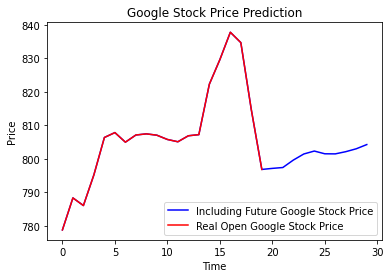

In [ ]:
plt.plot(y_future_lr_20, color = 'blue', label = 'Including Future Google Stock Price')

plt.plot(test_open.flatten(), color = 'red', label = 'Real Open Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
train_data_open_40 = []
y_train_data_open_40 = []
x_lr_40 = train_open.flatten()
y_lr_40 = test_open.flatten()

full_train_lr_40 = np.concatenate([x_lr_40, y_lr_40])
full_train_lr_40_ = np.reshape(full_train_lr_40, (len(full_train_lr_40), 1))
for i in range(40, len(full_train_lr_40)):
    train_data_open_40.append(full_train_lr_40_.flatten()[i-40:i])
    y_train_data_open_40.append(full_train_lr_40_.flatten()[i])
train_data_open_40 = np.array(train_data_open_40)
y_train_data_open_40 = np.array(y_train_data_open_40)

train_data_open_40.shape

(1238, 40)

In [ ]:
from sklearn.linear_model import LinearRegression
reg_40 = LinearRegression()
reg_40.fit(train_data_open_40, y_train_data_open_40)

LinearRegression()

In [ ]:
y_pred_lr_40 = []
def future_pred_lr_40(point):
    x_40 = train_open.flatten()
    req_train_40 = x_40[len(x_40)-20:]
    y_40 = test_open.flatten()
    z_40 = np.concatenate([req_train_40, y_40])
    new_test_data = z_40.flatten()
    new_test_data_40 = np.reshape(new_test_data, (len(new_test_data), 1))
    
    for i in range(point):
      X_test_40 = []
      X_test_40.append(new_test_data_40.flatten()[i:])
      X_test_40 = np.array(X_test_40)
      a = reg_40.predict(X_test_40)
      y_pred_lr_40.append(a)
      new_test_data_40 = np.concatenate([new_test_data_40.flatten(), a])
      new_test_data_40 = np.reshape(new_test_data_40, (len(new_test_data_40), 1))

  
future_pred_lr_40(10)
y_pred_lr_40
      



[array([798.34094866]),
 array([799.10951839]),
 array([800.68334755]),
 array([803.84371636]),
 array([806.22362898]),
 array([806.62447378]),
 array([806.92074628]),
 array([806.02770848]),
 array([807.88213341]),
 array([808.53878628])]

In [ ]:
y_future_lr_40 = np.concatenate([test_open.flatten(), np.array(y_pred_lr_40).flatten()])


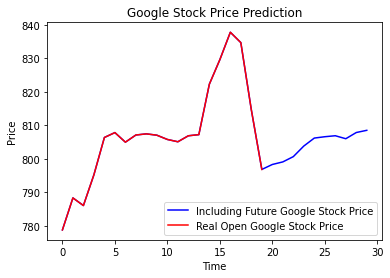

In [ ]:
plt.plot(y_future_lr_40, color = 'blue', label = 'Including Future Google Stock Price')

plt.plot(test_open.flatten(), color = 'red', label = 'Real Open Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()